# Lab 10: Fully Connected Network

In this lab you will implement your first neural network, consisting of a series of fully connected layers. This type of neural network is known as a fully connected network (FCN), and we will implement it using Tensorflow and Keras.

<a name="1"></a>
## 1. Load the data 




In [1]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, Y_train), (x_test, y_test)= mnist.load_data()  #load the MNIST dataset

#normalization so that data lays in [0,1] interval
X_train, x_test= X_train/255.0, x_test/255.0  

num_classes=10

#first we use only 500 images as our train set
# X_train , Y_train= X_train[:500] , Y_train[:500] 

# splitting the train data into train and validation data
x_train, x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size=0.1) 

print(x_train.shape,y_train.shape, x_val.shape,y_val.shape)

#use one-hot encoding for the desired output labels y
y_train_1hot = keras.utils.to_categorical(y_train, num_classes)
y_test_1hot  = keras.utils.to_categorical(y_test, num_classes)
y_val_1hot   = keras.utils.to_categorical(y_val, num_classes)



(54000, 28, 28) (54000,) (6000, 28, 28) (6000,)


<a name="1"></a>
## 2. Build the model

In [2]:
#build model
model =keras.models.Sequential([
                            keras.layers.Flatten(input_shape=(28, 28)),    # this is a special input layer, defined by the size of the input images
                            keras.layers.Dense(296, activation='relu'), # first layer with ____ output classes 
                            keras.layers.Dense(148, activation='relu'), # first layer with ____ output classes 
                            keras.layers.Dense(74, activation='relu'),  # second layer with ____ output classes 
                            keras.layers.Dense(37, activation='relu'),  # third layer added
                            keras.layers.Dropout(0.2),                  # with the possibility of 20% a node in a layer  may be ignored
                            keras.layers.Dense(10, activation='softmax')   # output layer with 10 output classes (number of classes)
 ])

#compile model
model.compile(optimizer = 'SGD', # choose your optimizer
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


# number of neurons initially in the file
# first dense layer - 128
# second dense layer - 64

<a name="1"></a>
## 3. Train the model





In [3]:
#train the model
r = model.fit(x_train , y_train_1hot ,batch_size=25, validation_data=(x_val, y_val_1hot),epochs=25)  #choose your batch size


Epoch 1/25
2160/2160 [==============================] - 12s 5ms/step - loss: 0.7627 - accuracy: 0.7670 - val_loss: 0.2868 - val_accuracy: 0.9200
Epoch 2/25
2160/2160 [==============================] - 10s 5ms/step - loss: 0.2882 - accuracy: 0.9183 - val_loss: 0.1980 - val_accuracy: 0.9422
Epoch 3/25
2160/2160 [==============================] - 10s 5ms/step - loss: 0.2134 - accuracy: 0.9409 - val_loss: 0.1615 - val_accuracy: 0.9492
Epoch 4/25
2160/2160 [==============================] - 11s 5ms/step - loss: 0.1700 - accuracy: 0.9518 - val_loss: 0.1476 - val_accuracy: 0.9535
Epoch 5/25
2160/2160 [==============================] - 11s 5ms/step - loss: 0.1426 - accuracy: 0.9595 - val_loss: 0.1268 - val_accuracy: 0.9593
Epoch 6/25
2160/2160 [==============================] - 10s 5ms/step - loss: 0.1229 - accuracy: 0.9649 - val_loss: 0.1210 - val_accuracy: 0.9615
Epoch 7/25
2160/2160 [==============================] - 10s 5ms/step - loss: 0.1048 - accuracy: 0.9697 - val_loss: 0.1105 - val_ac

<a name="1"></a>
## 4. Validating the model

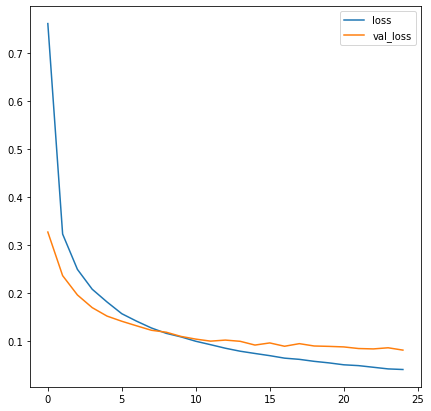

In [4]:
#plot loss
plt.figure(figsize = (7,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

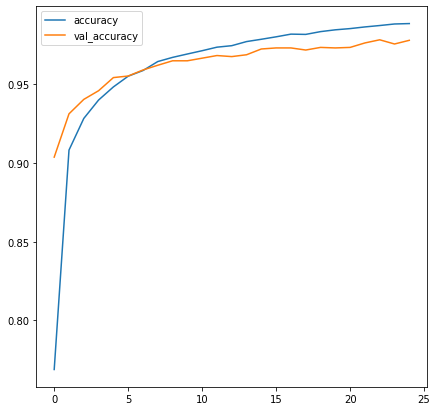

In [5]:
#plot accuracy
plt.figure(figsize = (7,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


<a name="1"></a>
## 5. Testing the accuracy of the model

In [6]:
#evaluate
loss,accuracy = model.evaluate( x_test, y_test_1hot) #let's see how the test set works with our model

print("loss:{:.2f} , accuracy:{:.2f}%".format(loss, accuracy*100) )  
# print(x_test.shape)

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9757
loss:0.08 , accuracy:97.57%


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 972    1    1    1    0    1    2    1    1    0]
 [   0 1122    4    1    0    0    4    1    3    0]
 [   6    0 1008    3    5    0    2    4    4    0]
 [   0    0    7  982    1    7    0    4    6    3]
 [   2    0    2    1  961    0    5    3    0    8]
 [   4    1    0    6    1  866    6    1    4    3]
 [   7    3    1    1    4    2  938    0    2    0]
 [   3    5    8    2    1    0    0  999    5    5]
 [   8    1    2    2    5    4    6    4  940    2]
 [   6    2    0    7    9    2    2    4    8  969]]


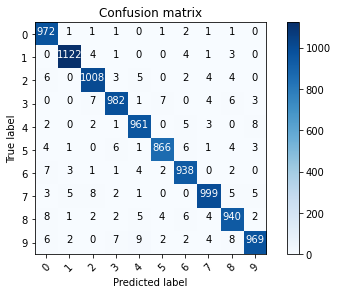

In [7]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10))) #we have numbers from 0 to 9 
# in the result of this part we see that the large number of mistakes are on number 9 that 
# is mistaken for number 4 (may be different on each run)
  
                      

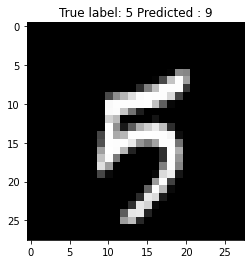

In [8]:
# let's show some misclassified images

# gather all misclassified indices (where function returns 2 elements, we only need the first one so we use [0])
misclassified_idx = np.where(p_test != y_test)[0] 
# randomly choose a misclassified index. you can set i as any class number you prefer
i = np.random.choice(misclassified_idx) 


# if we do not say it is gray, the image will show up as a heat map
plt.imshow(x_test[i], cmap='gray') 
plt.title("True label: %s Predicted : %s"%(y_test[i], p_test[i]));